# Demonstration of `smood`

### With `smood`, we just have to name 1) a species and 2) a lat/lon bounding box, and we can collect gbif observations and push them through maxent to make fun maps.

In [1]:
import smood

### we can define our species and boundary right away:

In [2]:
# define our object
mapobj = smood.Mapper(sp_name = "Monarda fistulosa",
                      lat_range=[19.0,52.0],
                      lon_range=[-125.0,-68.0])

In [3]:
mapobj.profile

{'spname': 'Monarda fistulosa',
 'ymin': 19.0,
 'ymax': 52.0,
 'xmin': -125.0,
 'xmax': -68.0,
 'worldclim_layers': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19]}

### or we can leave it for later:

In [4]:
# define our object
mapobj = smood.Mapper()

In [5]:
mapobj.profile

{'spname': None,
 'ymin': None,
 'ymax': None,
 'xmin': None,
 'xmax': None,
 'worldclim_layers': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19]}

In [6]:
mapobj.profile['spname'] = "Monarda fistulosa"
mapobj.profile['ymin'] = 19.0
mapobj.profile['ymax'] = 52.0
mapobj.profile['xmin'] = -125.0
mapobj.profile['xmax'] = -68.0

In [7]:
mapobj.profile

{'spname': 'Monarda fistulosa',
 'ymin': 19.0,
 'ymax': 52.0,
 'xmin': -125.0,
 'xmax': -68.0,
 'worldclim_layers': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19]}

### we can also look at where files will be written / looked for:

In [8]:
mapobj.maxent_path

'/Users/pmckenz1/googledrive/projects/smood/bins/maxent.jar'

In [9]:
mapobj.outputs_dir

'maxent_outputs/'

In [10]:
mapobj.worldclim_dir

'/Users/pmckenz1/googledrive/projects/smood/worldclim'

### now we can use a simple `run()` function to make things go:

The `run()` function calls gbif to find all observations of the species within the bounding box, and then it runs maxent using these observations and the designated worldclim layers.

Although this writes to disk, everything that is written is then cleaned up unless you ask for it to stay with `write_outputs=True`.

In [11]:
mapobj.run()

## results:

### raw png output from maxent (including occurrence data and the prediction densities)

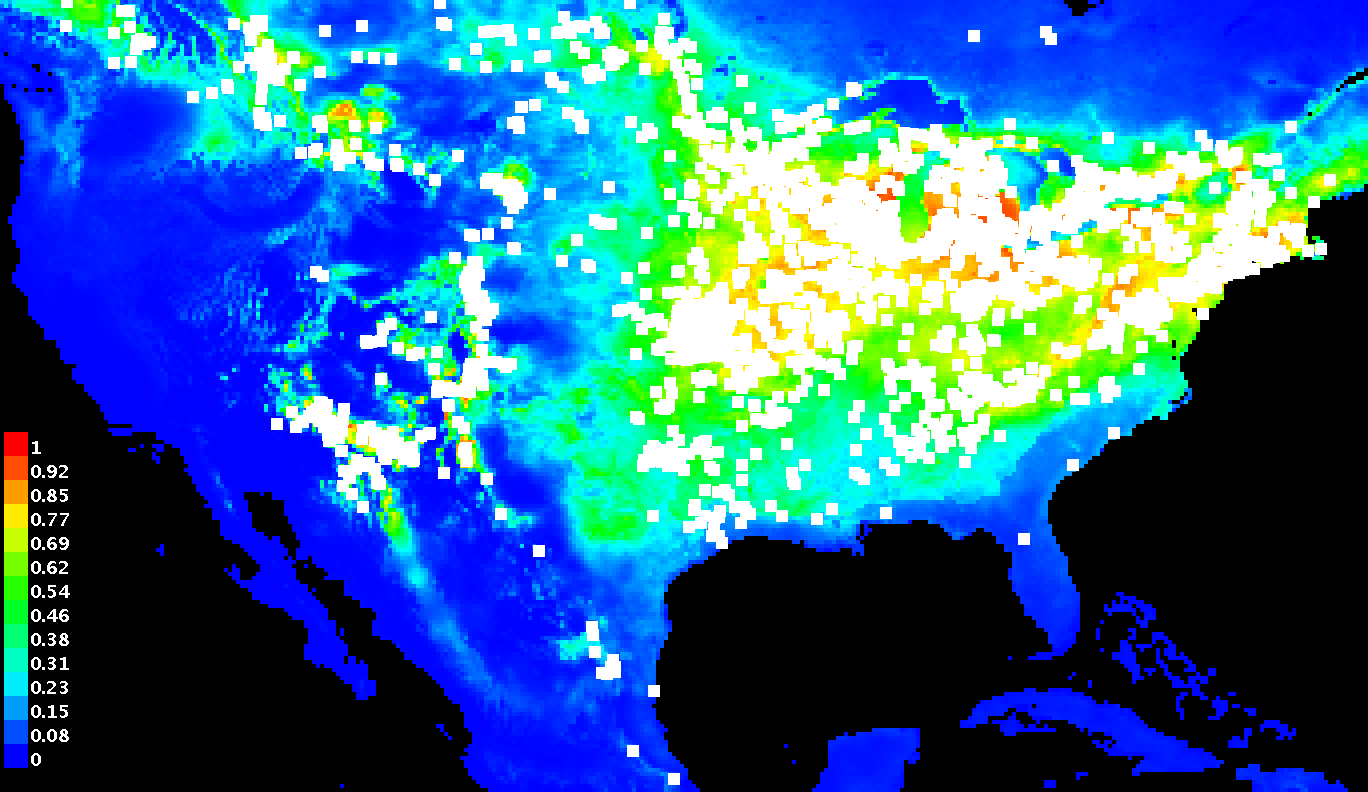

In [12]:
mapobj.maxent_image

### we can isolate the occurrence data

In [13]:
mapobj.lons

array([-87.822704, -87.893968, -88.075241, ..., -83.78194 , -81.0625  ,
       -83.19139 ])

In [14]:
mapobj.lats

array([42.39605 , 41.67832 , 40.525758, ..., 41.65722 , 39.92444 ,
       40.54833 ])

### we can also work with the density matrix

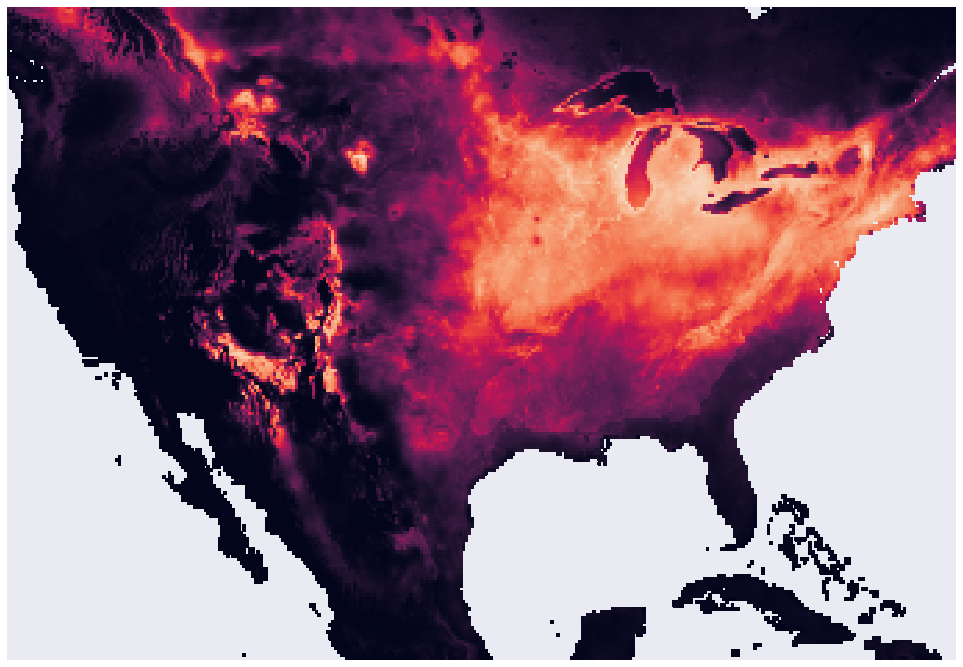

In [15]:
smood.plot_density(density_mat=mapobj.density_mat)

### we can set a threshold on this matrix over which everything is considered "filled" and under which everything is considered "empty"

### start with a high threshold:

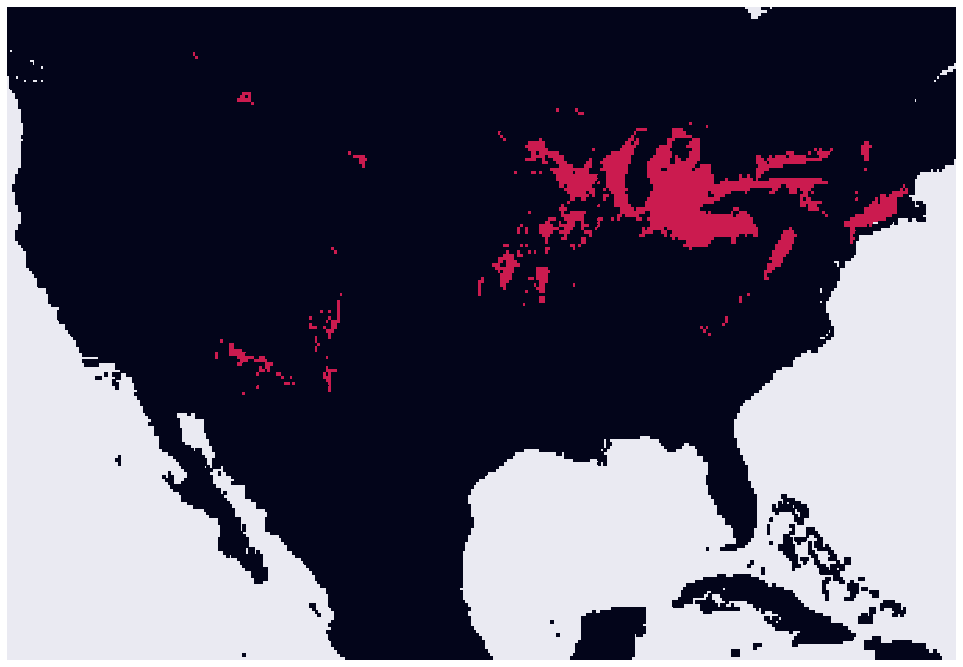

In [16]:
smood.plot_threshold(density_mat=mapobj.density_mat, 
                     threshold=.8)

### now try with a lower threshold:

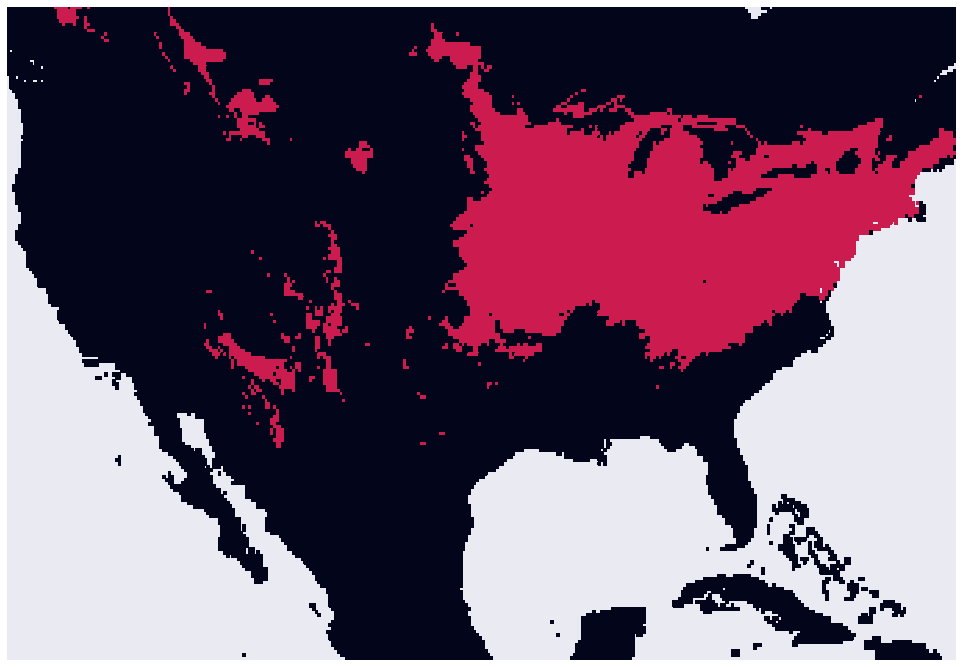

In [17]:
smood.plot_threshold(density_mat=mapobj.density_mat,
                     threshold=.5)